In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
import seaborn as sns
from sklearn.neighbors import RadiusNeighborsClassifier
from warnings import filterwarnings
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
filterwarnings('ignore')
%matplotlib inline

# **1.Load the dataset**

In [2]:
df=pd.read_csv('/content/WineQT.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


# **2.Domain understanding**

**1.Problem Type:**

Predict wine quality based on physicochemical properties.

Can be binary classification (Good/Bad) or regression (score 0–10).




**2.Goal / Real-World Application:**

Automatically evaluate wine batches without manual tasting.

Detect low-quality wines early.

Recommend wines to consumers based on predicted quality.

**3.Features:**

**fixed acidity**

High → more acidic, sharper taste

Low → less acidic, flatter taste

Best: Moderate to slightly high → balanced taste → may get higher quality score


**volatile acidity**

High → vinegar-like taste → bad

Low → balanced taste → good

Best: Low → higher quality


**citric acid**

High → fresh, tangy flavor → good

Low → less fresh → may be bland

Best: Moderate to high → contributes positively


**residual sugar**

High → sweeter, heavy wine

Low → drier wine

Best: Moderate → balanced sweetness → higher score


**chlorides**

High → salty taste → negative

Low → better taste

Best: Low → higher quality


**free sulfur dioxide**

High → better preservation

Low → wine may spoil faster

Best: Moderate → preserves wine without affecting taste


**total sulfur dioxide**

High → strong microbial protection

Low → risk of spoilage

Best: Moderate → safe storage → good quality


**density**

High → sweeter/heavier wine

Low → lighter, less sugar

Best: Moderate → balanced body → higher score


**pH**

High → less acidic, flatter taste

Low → more acidic, sharper taste

Best: Moderate (around 3–3.5) → balanced taste


**sulphates**

High → longer preservation, slightly bitter

Low → less preservation

Best: Moderate → protects wine without harming taste


**alcohol**

High → stronger body, more flavor

Low → weaker taste, lighter body

Best: Moderate to high → enhances wine quality


**quality**

High → better wine

Low → worse wine

# **3.Descriptive analysis**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [6]:
df.shape

(1143, 13)

In [7]:
df['quality'].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


# **4.Exploratory Data Analysis (EDA)**

**1).Univariate Analysis**

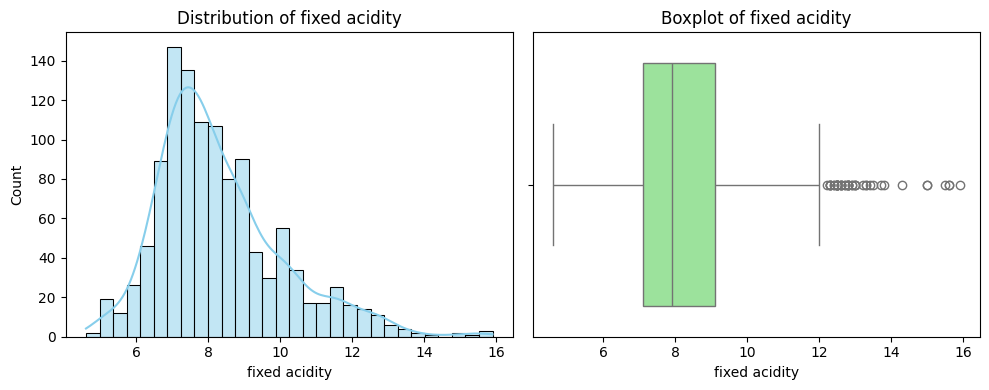

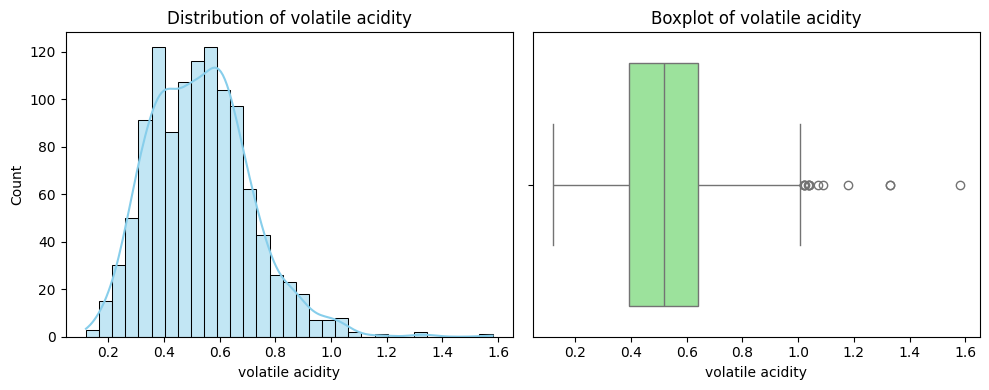

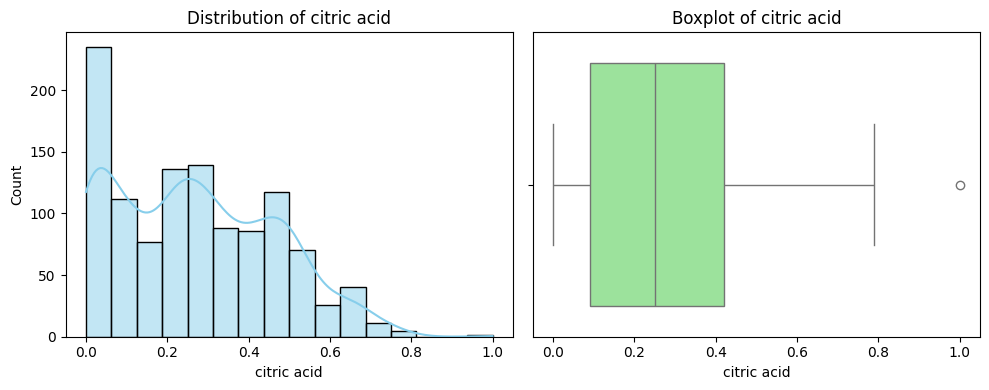

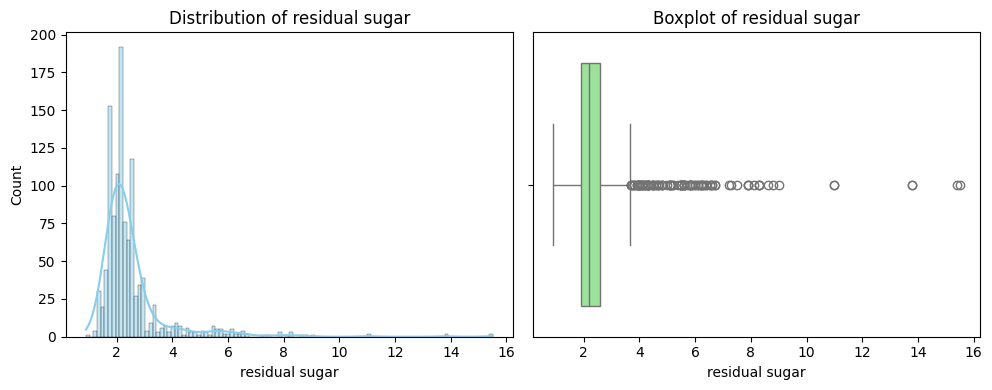

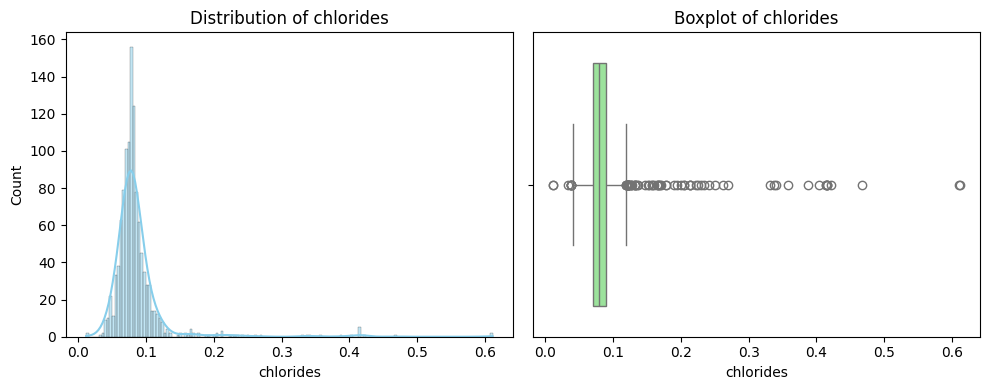

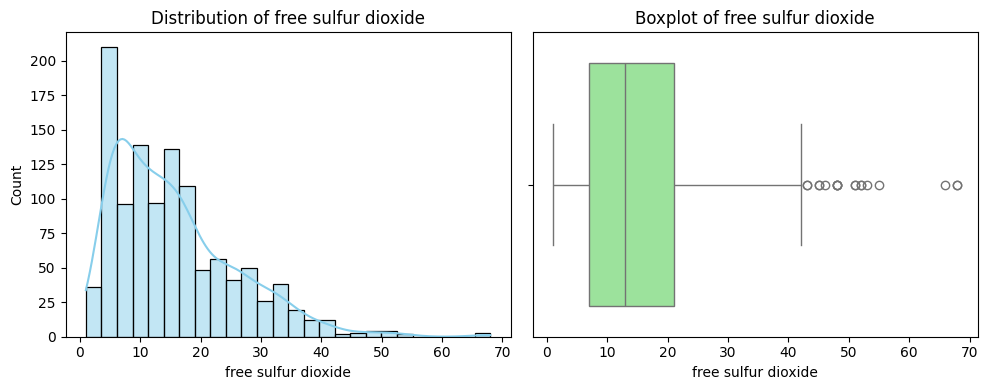

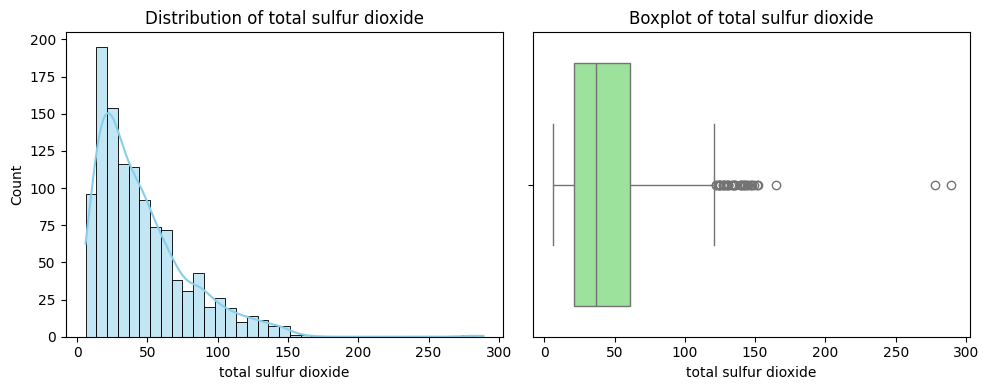

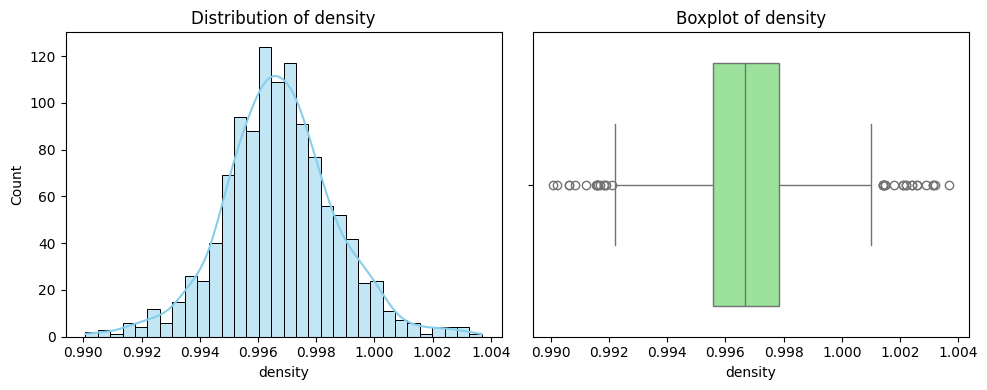

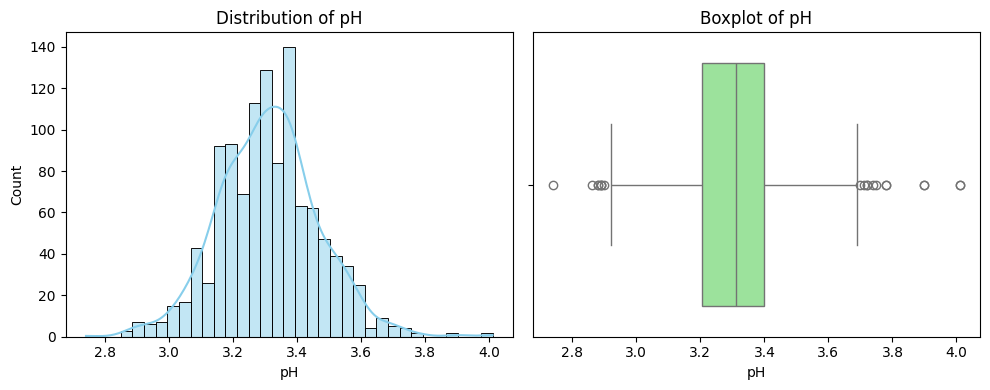

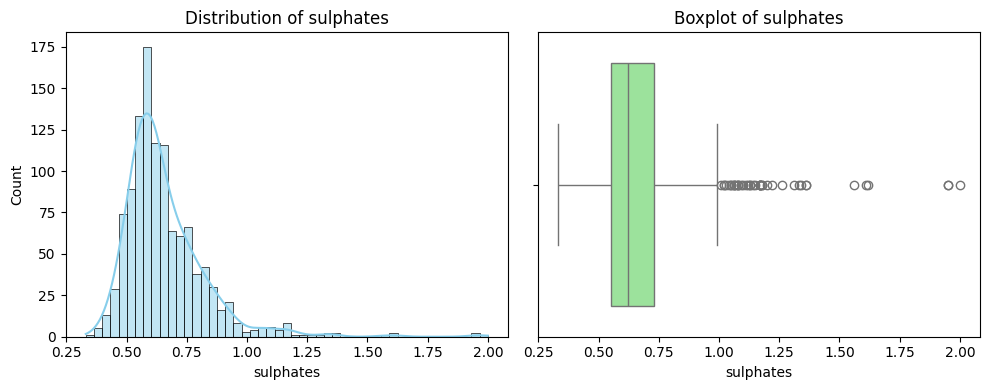

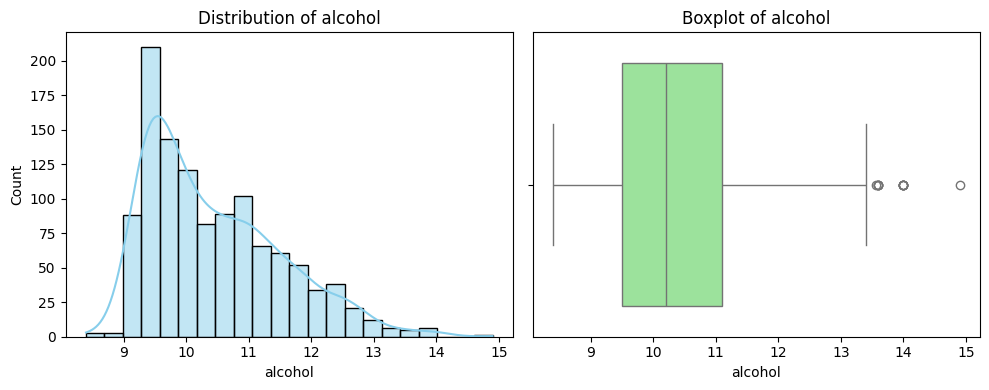

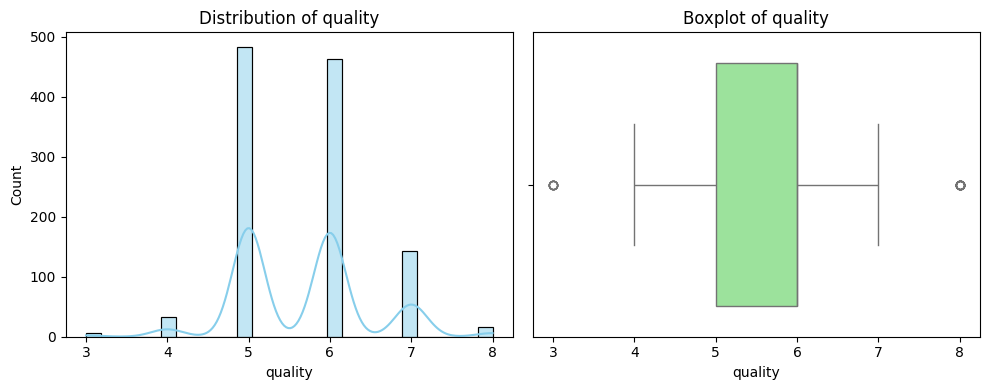

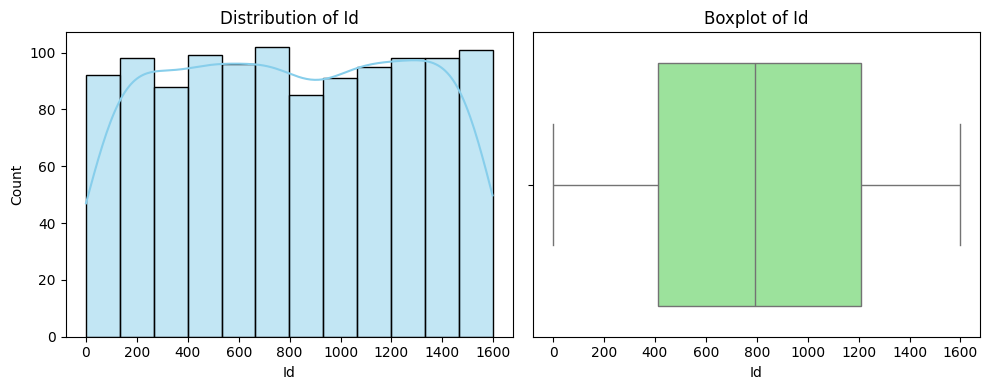

In [8]:
features = df.columns
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(df[feature], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {feature}')
    sns.boxplot(x=df[feature], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()

In [9]:
df.skew().sort_values(ascending=False)

,0
chlorides,6.026360
residual sugar,4.361096
sulphates,2.497266
total sulfur dioxide,1.665766
free sulfur dioxide,1.231261
fixed acidity,1.044930
alcohol,0.863313
volatile acidity,0.681547
citric acid,0.371561
quality,0.286792


### Skewness Interpretation Guide

Skewness measures the asymmetry of a feature's distribution. Here's how to interpret it:

- **|Skewness| < 0.5** → Distribution is fairly symmetric → No transformation needed
- **0.5 ≤ |Skewness| < 1.0** → Moderate skew → Transformation is optional
- **|Skewness| ≥ 1.0** → Highly skewed →  Transformation recommended

#### Common Transformations for Skewed Data:
- **Log Transformation**: `np.log1p(x)` — for right-skewed data with positive values
- **Square Root Transformation**: `np.sqrt(x)` — for moderate skew
- **Box-Cox or Yeo-Johnson** — for more flexible handling (via `scipy` or `sklearn`)

Transforming skewed features helps improve model performance by normalizing distributions and reducing the impact of outliers.


In [10]:
df['Id'].shape

(1143,)

In [11]:
df.drop(['Id'],axis=1,inplace=True)

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**2).Multivariate analysis**

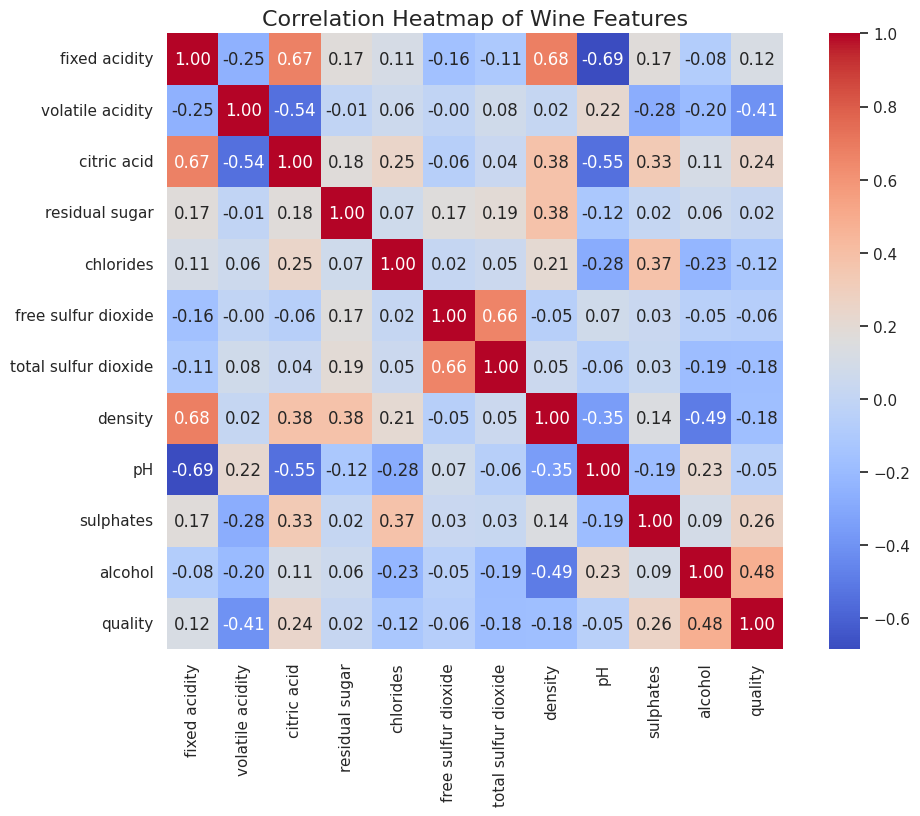

In [13]:
plt.figure(figsize=(12, 8))
sns.set(style="white")
sns.heatmap(df.corr(),
            annot=True,
            fmt=".2f", cmap='coolwarm',
            square=True)

plt.title("Correlation Heatmap of Wine Features", fontsize=16)
plt.show()

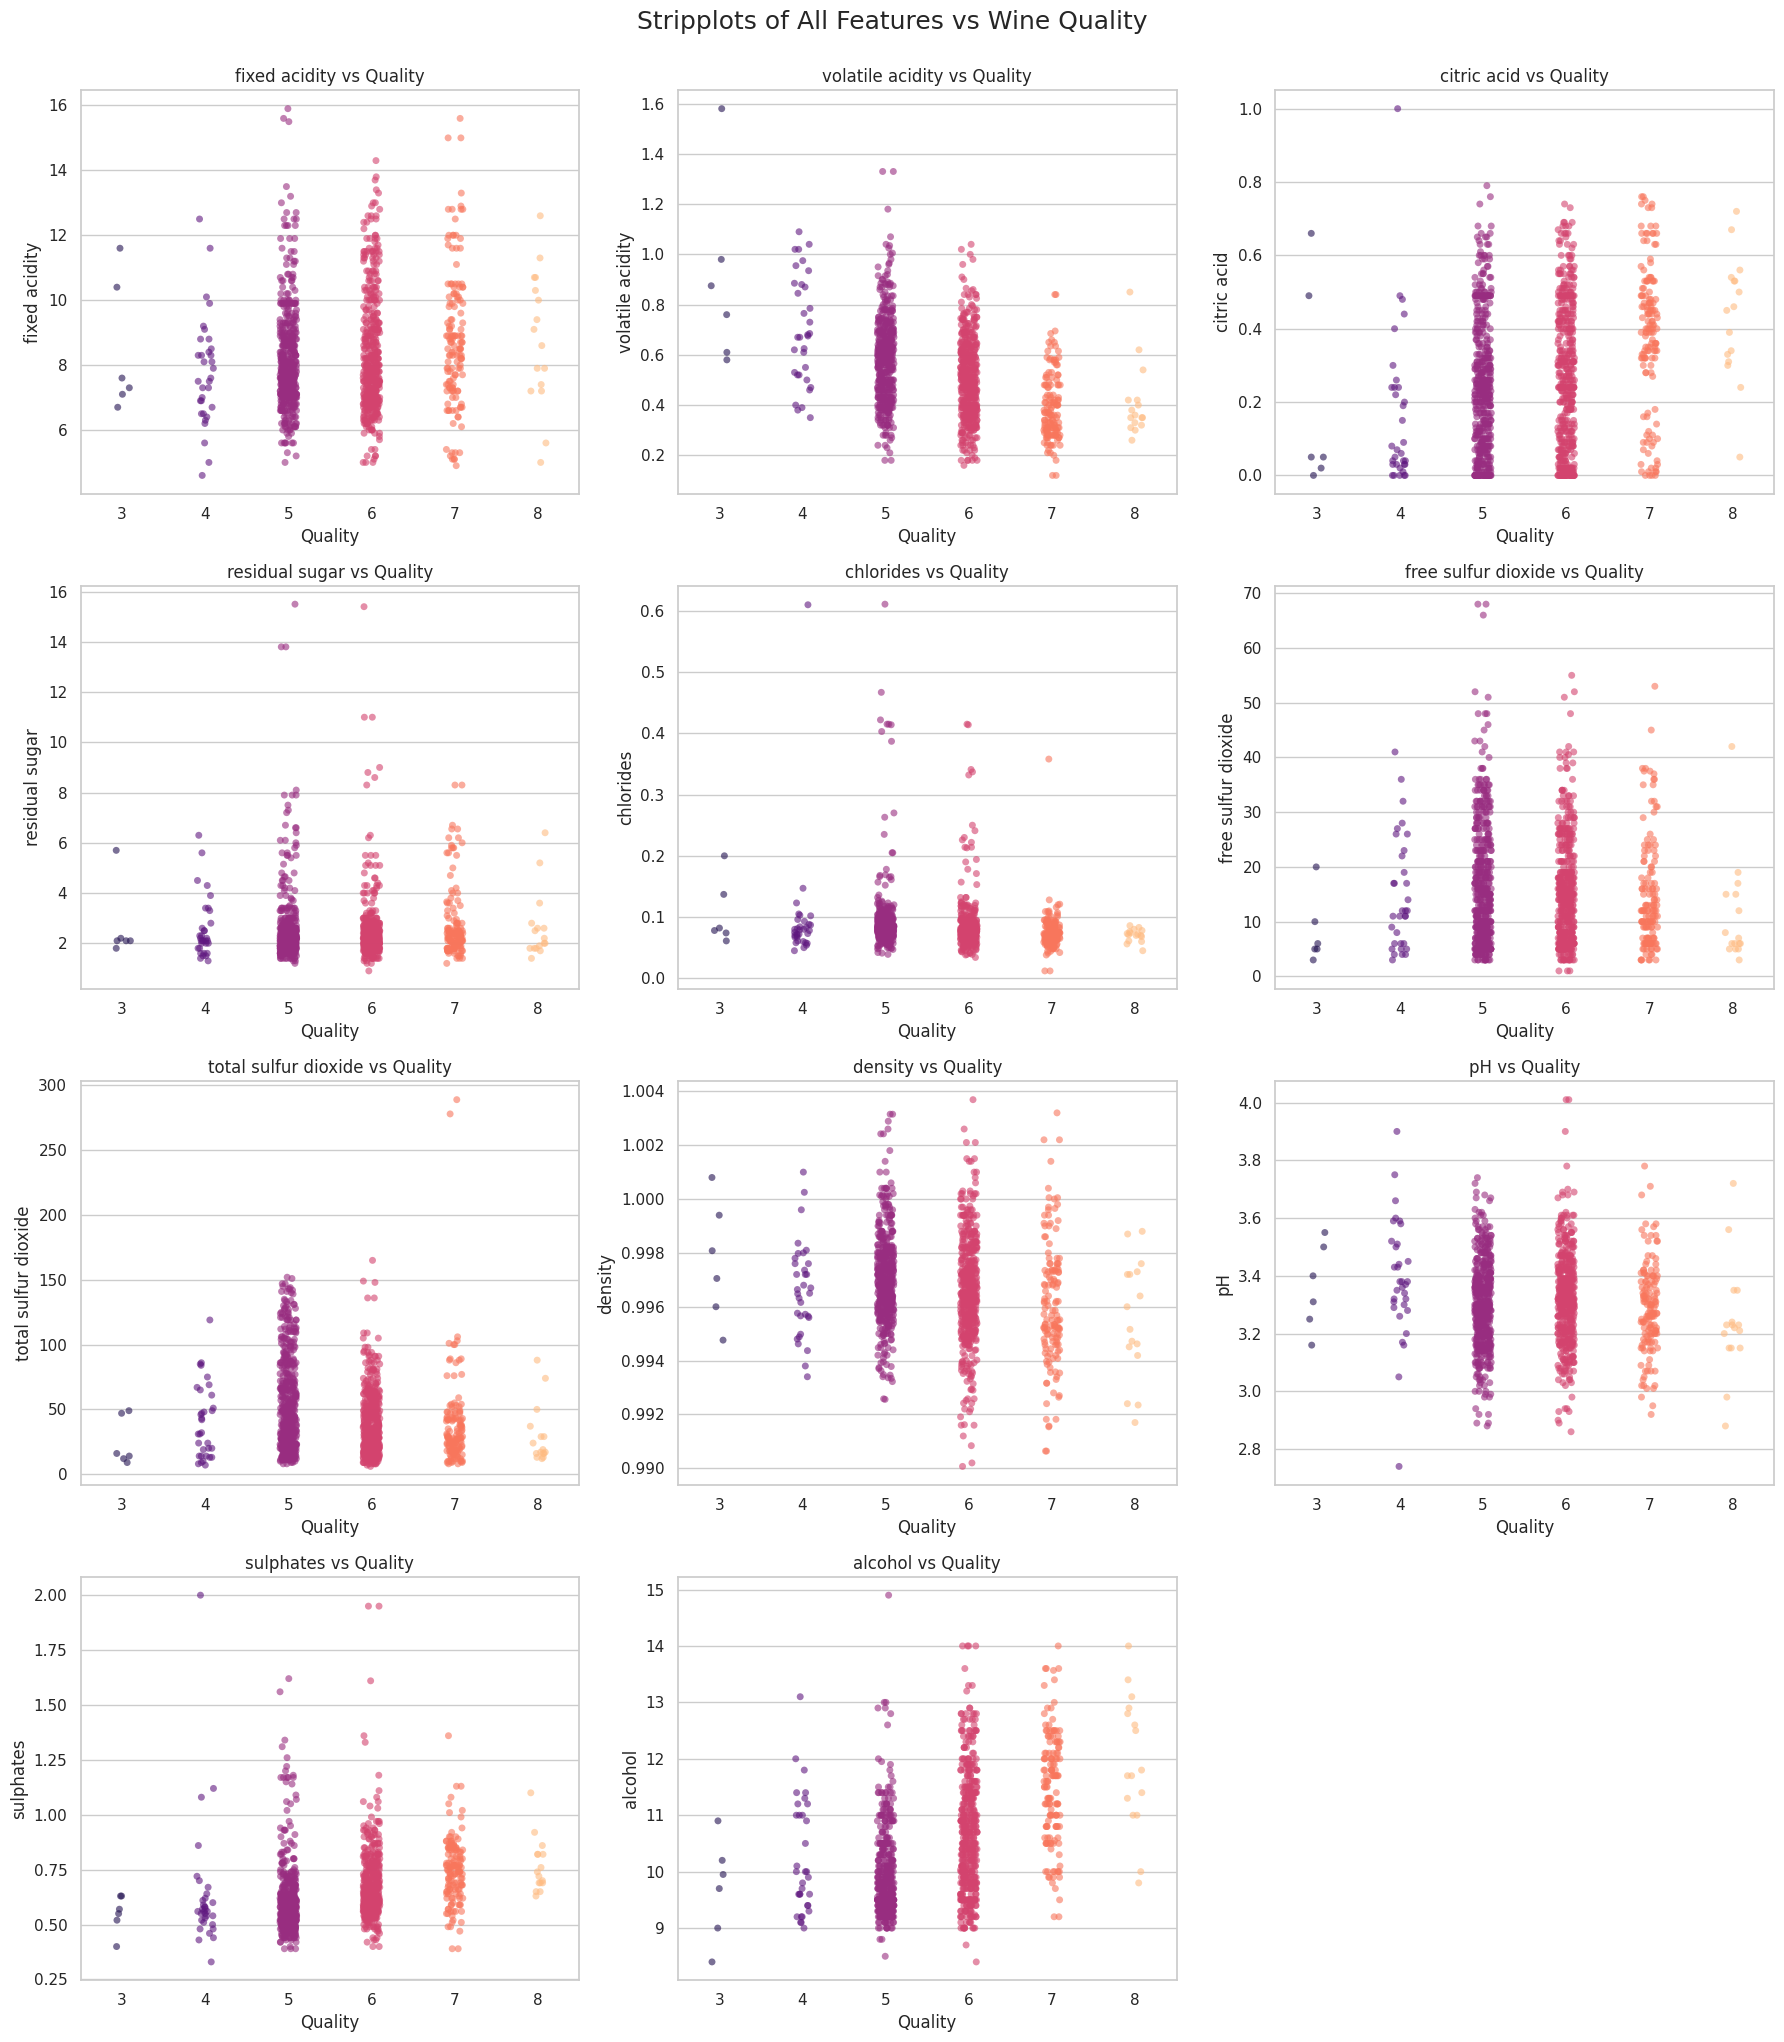

In [14]:
features = df.columns.drop('quality')
plt.figure(figsize=(18, 20))
sns.set(style="whitegrid")
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.stripplot(x='quality', y=feature, data=df, jitter=True, palette='magma', alpha=0.6)
    plt.title(f'{feature} vs Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)

plt.tight_layout()
plt.suptitle("Stripplots of All Features vs Wine Quality", fontsize=18, y=1.02)
plt.show()

###   Insights from Stripplots

- **Alcohol** increases with wine quality → strong positive trend.
- **Volatile acidity** decreases with quality → negative impact on taste.
- **Sulphates** show higher values in better quality wines → helps preservation.
- **Citric acid** and **residual sugar** have mixed patterns → less clear influence.
- **Outliers** are visible in several features → may affect model performance.
- Helps identify which features are most useful for predicting wine quality.


# **5.Data preprocessing**

**a).Skewness handling**

In [15]:
df.skew()

,0
fixed acidity,1.044930
volatile acidity,0.681547
citric acid,0.371561
residual sugar,4.361096
chlorides,6.026360
free sulfur dioxide,1.231261
total sulfur dioxide,1.665766
density,0.102395
pH,0.221138
sulphates,2.497266


**🔹Highly Skewed Features**
These have long tails and need strong compression:

Fixed Acidity: We'd reshape the distribution using a logarithmic scale or a flexible method like Box-Cox, which adjusts based on the data’s shape.

Residual Sugar: Since the skew is extreme, a log transformation would shrink the large values and balance the distribution.

Chlorides: Same treatment—log or Box-Cox to reduce the impact of outliers.

Free Sulfur Dioxide and Total Sulfur Dioxide: Both would benefit from a log or Yeo-Johnson transformation to normalize the spread.

Sulphates: A log transformation would help smooth the distribution.

**🔸 Moderately Skewed Features**
These need gentle nudging:

Volatile Acidity: A square root transformation would soften the skew without overcorrecting.

Alcohol: Also moderately skewed, so a square root transformation would be appropriate.

**⚪ Fairly Symmetric Features**
These are already well-behaved:

Citric Acid, Density, pH, and Quality: No transformation needed—they’re close enough to normal.

In [16]:
log_transform = FunctionTransformer(np.log1p, validate=True)
sqrt_transform = FunctionTransformer(np.sqrt, validate=True)
skew_transformers = [
    ('log_fixed_acidity', log_transform, ['fixed acidity']),
    ('sqrt_volatile_acidity', sqrt_transform, ['volatile acidity']),
    ('log_residual_sugar', log_transform, ['residual sugar']),
    ('log_chlorides', log_transform, ['chlorides']),
    ('log_free_sulfur_dioxide', log_transform, ['free sulfur dioxide']),
    ('log_total_sulfur_dioxide', log_transform, ['total sulfur dioxide']),
    ('log_sulphates', log_transform, ['sulphates']),
    ('sqrt_alcohol', sqrt_transform, ['alcohol'])
]
ct = ColumnTransformer(transformers=skew_transformers, remainder='passthrough')
transformed_array = ct.fit_transform(df)
transformed_cols = [col for _, _, cols in skew_transformers for col in cols]
unchanged_cols = [col for col in df.columns if col not in transformed_cols]
final_cols = transformed_cols + unchanged_cols
df_skew_handled = pd.DataFrame(transformed_array, columns=final_cols)

In [17]:
df_skew_handled.columns

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol',
       'citric acid', 'density', 'pH', 'quality'],
      dtype='object')

In [18]:
df_skew_handled.skew()

,0
fixed acidity,0.483318
volatile acidity,0.105824
residual sugar,2.158508
chlorides,5.348773
free sulfur dioxide,-0.092083
total sulfur dioxide,0.002587
sulphates,1.676450
alcohol,0.758978
citric acid,0.371561
density,0.102395


**b).Outlier handling**

In [19]:
df_outlier_handled = df_skew_handled.copy()
for column in df_outlier_handled.select_dtypes(include='number').columns:
    Q1 = df_outlier_handled[column].quantile(0.25)
    Q3 = df_outlier_handled[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outlier_handled[column] = np.where(
        df_outlier_handled[column] < lower_bound, lower_bound,
        np.where(df_outlier_handled[column] > upper_bound, upper_bound, df_outlier_handled[column])
    )

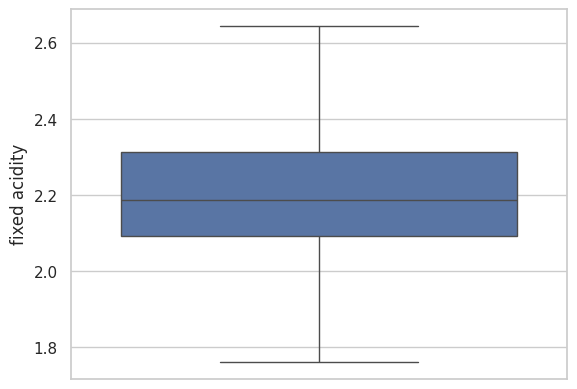

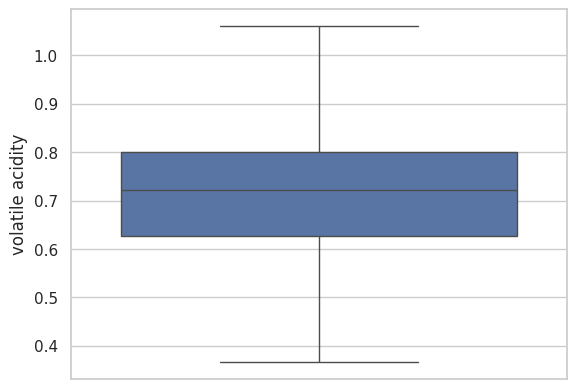

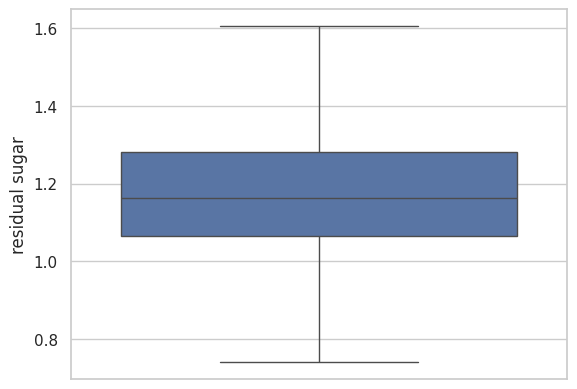

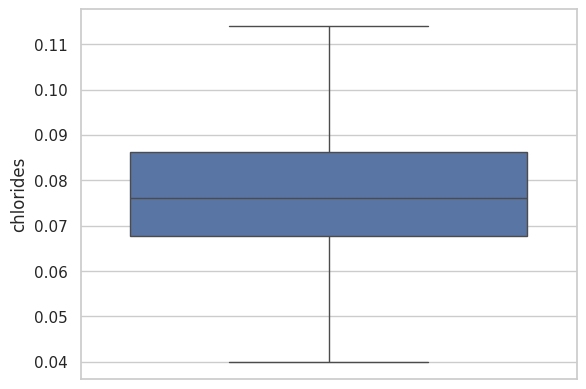

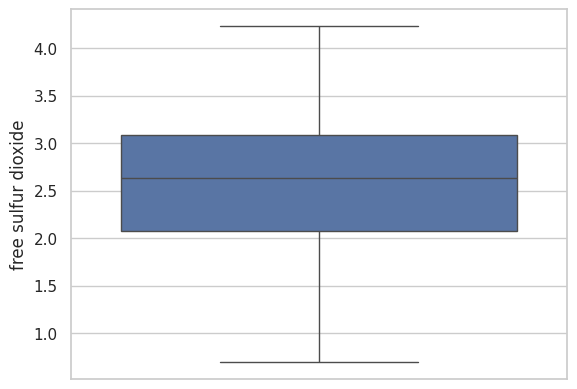

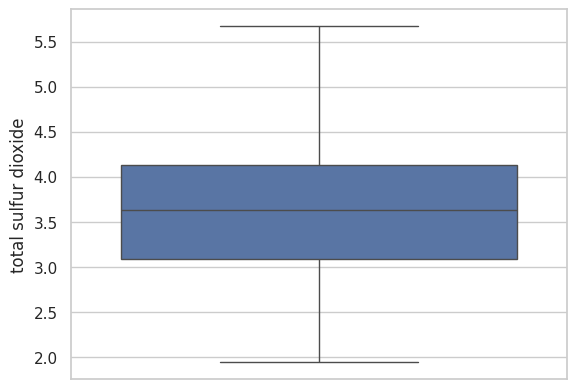

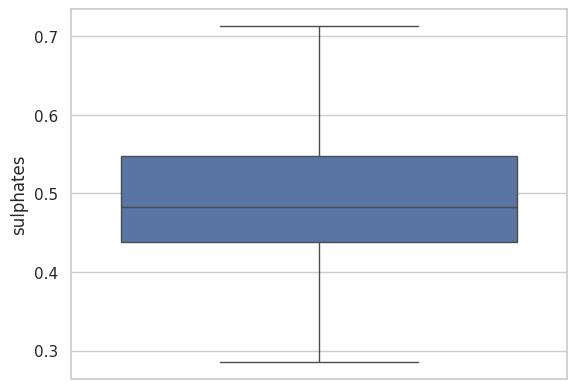

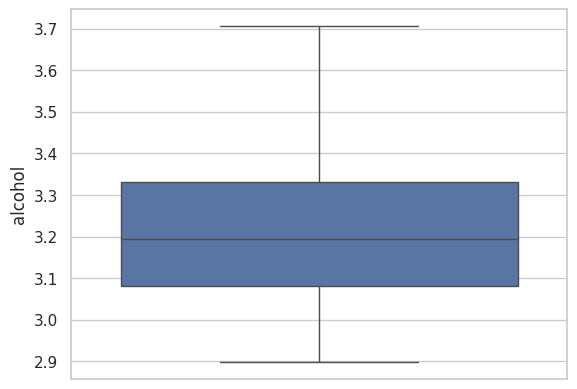

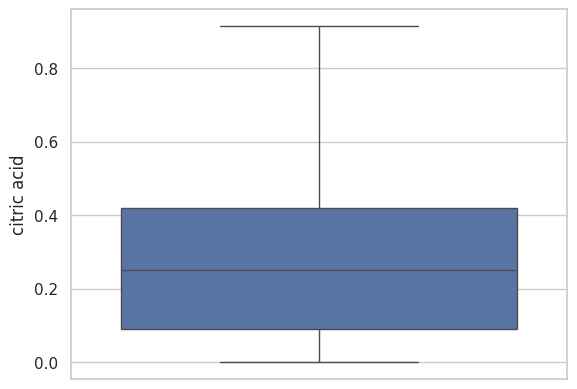

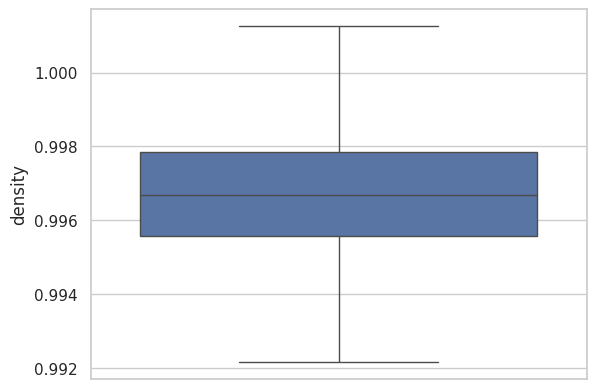

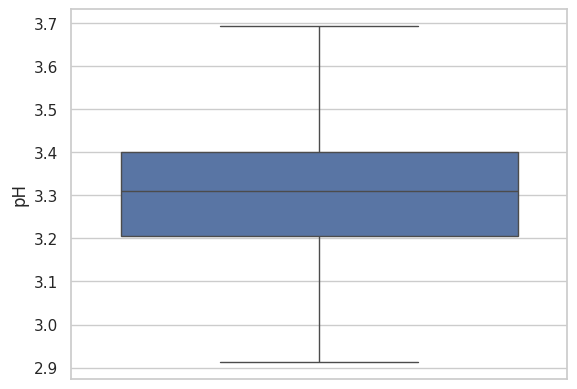

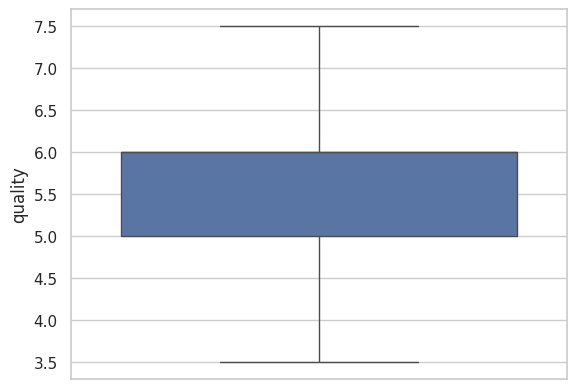

In [20]:
for column in df_outlier_handled.select_dtypes(include='number').columns:
  sns.boxplot(df_outlier_handled[column])
  plt.show()

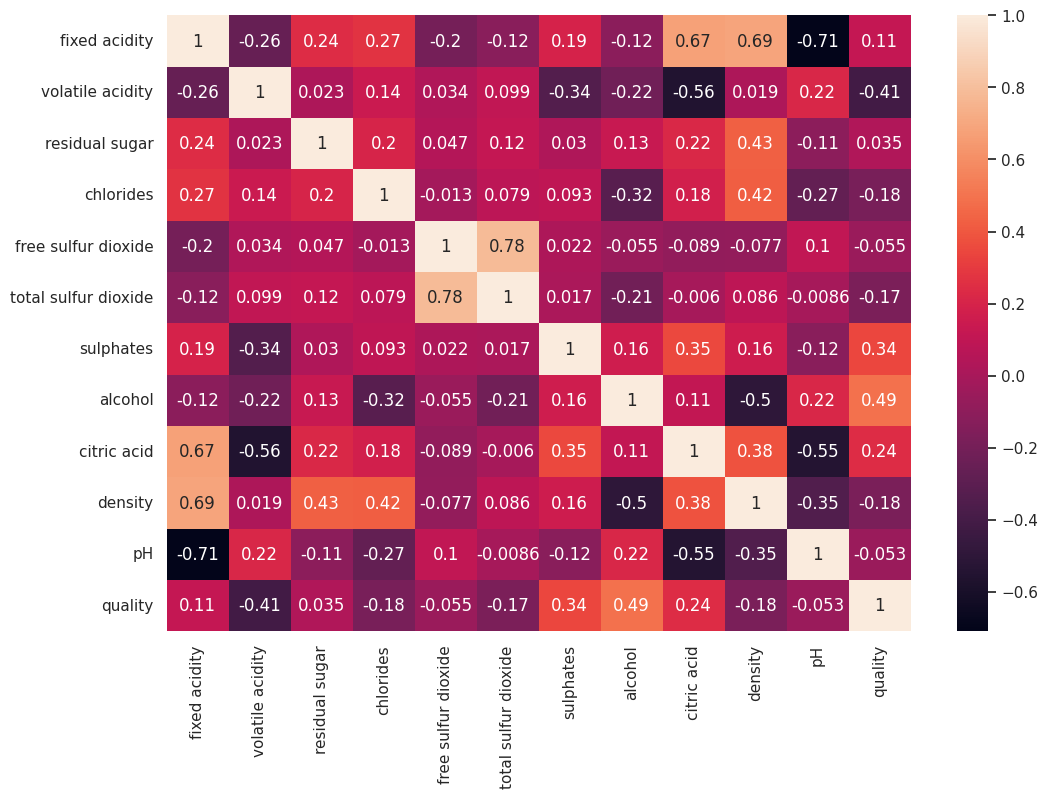

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_outlier_handled.corr(),annot=True)
plt.show()

**c).New dataset with most important features**

In [22]:
dataset_A = df_outlier_handled[['alcohol', 'volatile acidity',
                                'sulphates', 'citric acid',
                                'density', 'quality']]

**d).Another dataset with derived features from existing one**

In [23]:
df_temp = df_outlier_handled.copy()
df_temp['acid_balance'] = df_temp['fixed acidity'] - df_temp['volatile acidity']
df_temp['sugar_to_acid_ratio'] = df_temp['residual sugar'] / (df_temp['fixed acidity'] + df_temp['citric acid'])
df_temp['sulfur_ratio'] = df_temp['free sulfur dioxide'] / df_temp['total sulfur dioxide']
df_temp['alcohol_density_index'] = df_temp['alcohol'] / df_temp['density']
dataset_B = df_temp[['acid_balance', 'sugar_to_acid_ratio', 'sulfur_ratio',
                     'alcohol_density_index', 'alcohol',
                     'volatile acidity', 'sulphates', 'quality']]

In [24]:
dataset_A.head()

,alcohol,volatile acidity,sulphates,citric acid,density,quality
0,3.065942,0.836660,0.444686,0.00,0.9978,5.0
1,3.130495,0.938083,0.518794,0.00,0.9968,5.0
2,3.130495,0.871780,0.500775,0.04,0.9970,5.0
3,3.130495,0.529150,0.457425,0.56,0.9980,6.0
4,3.065942,0.836660,0.444686,0.00,0.9978,5.0


In [25]:
dataset_B.head()

,acid_balance,sugar_to_acid_ratio,sulfur_ratio,alcohol_density_index,alcohol,volatile acidity,sulphates,quality
0,1.291572,0.500280,0.698921,3.072702,3.065942,0.836660,0.444686,5.0
1,1.236669,0.589002,0.772151,3.140545,3.130495,0.938083,0.518794,5.0
2,1.302972,0.539077,0.691879,3.139915,3.130495,0.871780,0.500775,5.0
3,1.972286,0.347781,0.703104,3.136769,3.130495,0.529150,0.457425,6.0
4,1.291572,0.500280,0.698921,3.072702,3.065942,0.836660,0.444686,5.0


**e).Feature correlation for Dataset A**

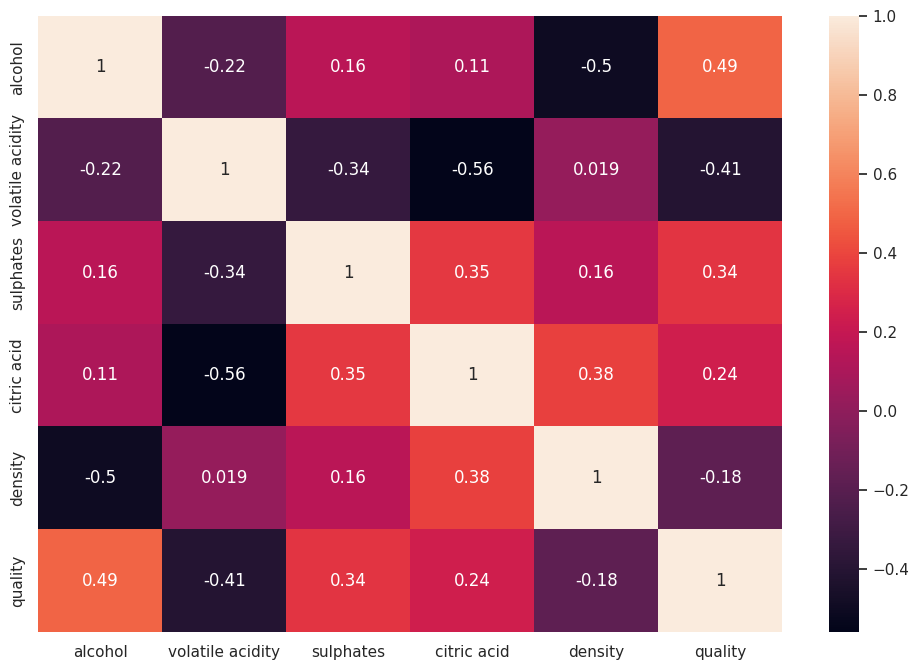

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset_A.corr(),annot=True)
plt.show()

**f).Feature correlation for Dataset B**

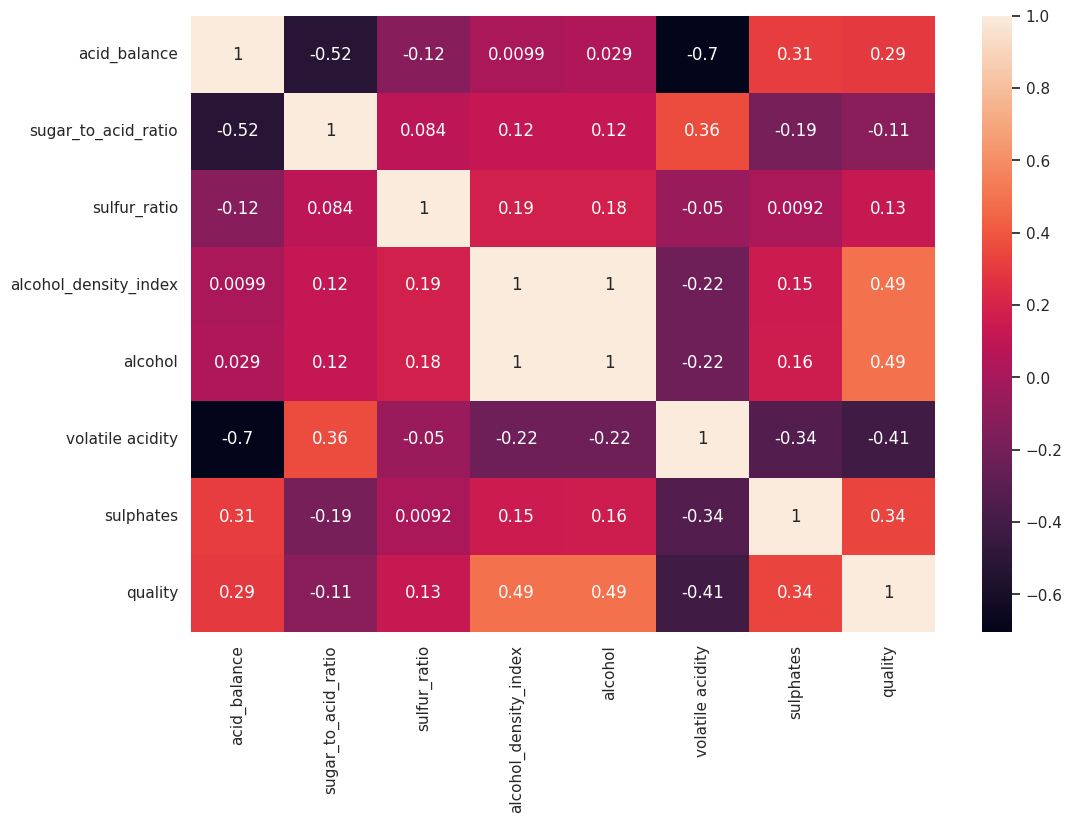

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset_B.corr(),annot=True)
plt.show()

In [28]:
dataset_A['quality'].value_counts()

,count
quality,
5.0,483
6.0,462
7.0,143
4.0,33
7.5,16
3.5,6


In [29]:
dataset_B['quality'].value_counts()

,count
quality,
5.0,483
6.0,462
7.0,143
4.0,33
7.5,16
3.5,6


# **4.Model Building for dataset_A**

**1).Converting Quality feature to binary values using threshold**

In [30]:
dataset_A['quality_binary'] = dataset_A['quality'].apply(lambda x: 1 if x >= 6.5 else 0)

In [31]:
X = dataset_A.drop(columns=['quality', 'quality_binary'])
y = dataset_A['quality_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**2).Handling imbalance using SMOTE**

In [32]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**3).DecisionTree Performance**

In [33]:
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dtree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtree, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_dtree = grid_search.best_estimator_

In [34]:
y_train_pred = best_dtree.predict(X_train_resampled)
y_test_pred = best_dtree.predict(X_test)
train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"\n Train Accuracy: {train_acc:.2f}")
print(f"\n Test Accuracy: {test_acc:.2f}")
print("\n Train Classification Report:\n", train_report)
print("\n Test Classification Report:\n", test_report)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}

 Train Accuracy: 0.97

 Test Accuracy: 0.86

 Train Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       787
           1       0.96      0.98      0.97       787

    accuracy                           0.97      1574
   macro avg       0.97      0.97      0.97      1574
weighted avg       0.97      0.97      0.97      1574


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       197
           1       0.51      0.78      0.62        32

    accuracy                           0.86       229
   macro avg       0.74      0.83      0.77       229
weighted avg       0.90      0.86      0.88       229



**4).RandomForest Performance**

In [35]:
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2,3, 5,6],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_rf.fit(X_train_resampled, y_train_resampled)

best_rf = grid_rf.best_estimator_

In [36]:
y_train_pred = best_rf.predict(X_train_resampled)
y_test_pred = best_rf.predict(X_test)
train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print(f"Best Parameters: {grid_rf.best_params_}")
print(f"\n Train Accuracy: {train_acc:.2f}")
print(f"\n Test Accuracy: {test_acc:.2f}")
print("\n Train Classification Report:\n", train_report)
print("\n Test Classification Report:\n", test_report)


Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 200}

 Train Accuracy: 1.00

 Test Accuracy: 0.89

 Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       787
           1       1.00      1.00      1.00       787

    accuracy                           1.00      1574
   macro avg       1.00      1.00      1.00      1574
weighted avg       1.00      1.00      1.00      1574


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       197
           1       0.58      0.69      0.63        32

    accuracy                           0.89       229
   macro avg       0.76      0.80      0.78       229
weighted avg       0.90      0.89      0.89       229



**5).SupportVectorClassifier Performance**

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [38]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}
svc = SVC(probability=True)
grid_svc = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy')
grid_svc.fit(X_train_scaled, y_train_resampled)
best_svc = grid_svc.best_estimator_

In [39]:
y_train_pred = best_svc.predict(X_train_scaled)
y_test_pred = best_svc.predict(X_test_scaled)
train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print(f" Best Parameters: {grid_svc.best_params_}")
print(f"\n Train Accuracy: {train_acc:.2f}")
print(f" Test Accuracy: {test_acc:.2f}")
print("\n Train Classification Report:\n", train_report)
print("\n Test Classification Report:\n", test_report)


 Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

 Train Accuracy: 0.92
 Test Accuracy: 0.78

 Train Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       787
           1       0.87      0.98      0.92       787

    accuracy                           0.92      1574
   macro avg       0.92      0.92      0.92      1574
weighted avg       0.92      0.92      0.92      1574


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86       197
           1       0.34      0.59      0.43        32

    accuracy                           0.78       229
   macro avg       0.63      0.70      0.65       229
weighted avg       0.84      0.78      0.80       229



**6).KNN classifier performance**

In [40]:
param_grid = {
    'n_neighbors': [1,2,3,4,5],
    'weights': ['uniform'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train_resampled)
best_knn = grid_knn.best_estimator_

In [41]:
y_train_pred = best_knn.predict(X_train_scaled)
y_test_pred = best_knn.predict(X_test_scaled)
train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print(f" Best Parameters: {grid_knn.best_params_}")
print(f"\n Train Accuracy: {train_acc:.2f}")
print(f" Test Accuracy: {test_acc:.2f}")
print("\n Train Classification Report:\n", train_report)
print("\n Test Classification Report:\n", test_report)


 Best Parameters: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}

 Train Accuracy: 0.99
 Test Accuracy: 0.85

 Train Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       787
           1       1.00      0.98      0.99       787

    accuracy                           0.99      1574
   macro avg       0.99      0.99      0.99      1574
weighted avg       0.99      0.99      0.99      1574


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       197
           1       0.47      0.50      0.48        32

    accuracy                           0.85       229
   macro avg       0.69      0.70      0.70       229
weighted avg       0.86      0.85      0.85       229



**7).XGB Classifier Performance**

In [42]:
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [2,3, 5, 7],
    'learning_rate': [0.01,0.05, 0.1, 0.2,0.3],
    'subsample': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_xgb = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy')
grid_xgb.fit(X_train_resampled, y_train_resampled)

best_xgb = grid_xgb.best_estimator_

In [43]:
y_train_pred = best_xgb.predict(X_train_resampled)
y_test_pred = best_xgb.predict(X_test)
train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print(f" Best Parameters: {grid_xgb.best_params_}")
print(f"\n Train Accuracy: {train_acc:.2f}")
print(f" Test Accuracy: {test_acc:.2f}")
print("\n Train Classification Report:\n", train_report)
print("\n Test Classification Report:\n", test_report)

 Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}

 Train Accuracy: 1.00
 Test Accuracy: 0.89

 Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       787
           1       0.99      1.00      1.00       787

    accuracy                           1.00      1574
   macro avg       1.00      1.00      1.00      1574
weighted avg       1.00      1.00      1.00      1574


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       197
           1       0.58      0.69      0.63        32

    accuracy                           0.89       229
   macro avg       0.76      0.80      0.78       229
weighted avg       0.90      0.89      0.89       229



**8).Logistic Regression Performance**

In [44]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train_resampled)

y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\n Train Accuracy: {train_acc:.2f}")
print(f" Test Accuracy: {test_acc:.2f}")
print("\n Train Classification Report:\n", classification_report(y_train_resampled, y_train_pred))
print("\n Test Classification Report:\n", classification_report(y_test, y_test_pred))


 Train Accuracy: 0.80
 Test Accuracy: 0.78

 Train Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       787
           1       0.79      0.81      0.80       787

    accuracy                           0.80      1574
   macro avg       0.80      0.80      0.80      1574
weighted avg       0.80      0.80      0.80      1574


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86       197
           1       0.36      0.75      0.48        32

    accuracy                           0.78       229
   macro avg       0.65      0.77      0.67       229
weighted avg       0.87      0.78      0.81       229



**ROC AUC curve for performed algorithms**

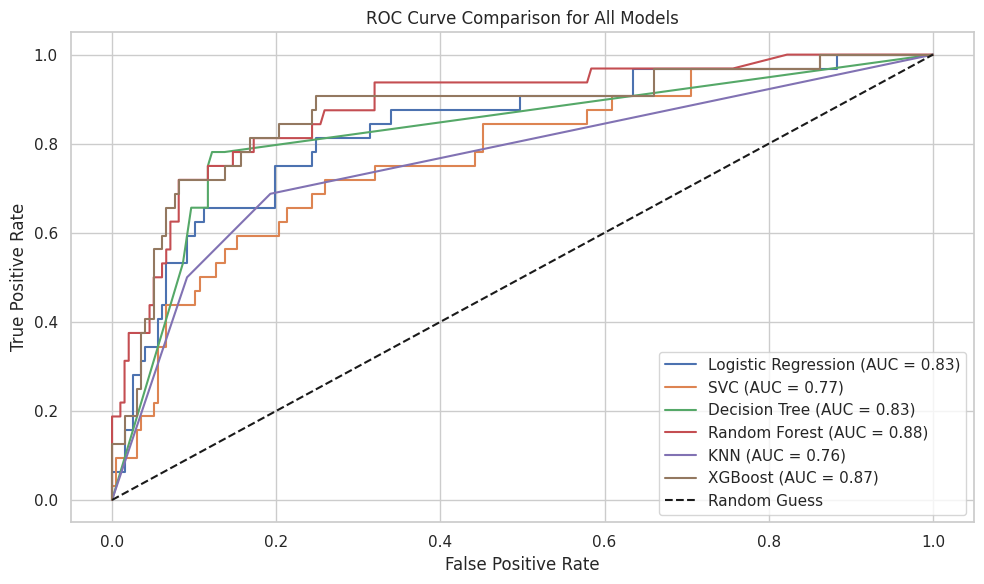

In [45]:
model_probs = {
    'Logistic Regression': logreg.predict_proba(X_test_scaled)[:, 1],
    'SVC': grid_svc.predict_proba(X_test_scaled)[:, 1],
    'Decision Tree': grid_search.predict_proba(X_test)[:, 1],
    'Random Forest': grid_rf.predict_proba(X_test)[:, 1],
    'KNN': grid_knn.predict_proba(X_test_scaled)[:, 1],
    'XGBoost': grid_xgb.predict_proba(X_test)[:, 1]
}

plt.figure(figsize=(10, 6))
for name, probs in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve Comparison for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Model Building for dataset_B**

In [46]:
dataset_B['quality_binary'] = dataset_B['quality'].apply(lambda x: 1 if x >= 6.5 else 0)

In [47]:
X = dataset_B.drop(columns=['quality', 'quality_binary'])
y = dataset_B['quality_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [49]:
param_grid = {
    'max_depth': [3, 5, 10,15,20],
    'min_samples_split': [2, 5, 10],'class_weight': ['balanced'],'max_leaf_nodes': [None, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

dtree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtree, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_dtree = grid_search.best_estimator_

In [50]:
y_train_pred = best_dtree.predict(X_train_resampled)
y_test_pred = best_dtree.predict(X_test)
train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"\n Train Accuracy: {train_acc:.2f}")
print(f"\n Test Accuracy: {test_acc:.2f}")
print("\n Train Classification Report:\n", train_report)
print("\n Test Classification Report:\n", test_report)

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': None, 'min_samples_split': 2}

 Train Accuracy: 1.00

 Test Accuracy: 0.88

 Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       787
           1       1.00      1.00      1.00       787

    accuracy                           1.00      1574
   macro avg       1.00      1.00      1.00      1574
weighted avg       1.00      1.00      1.00      1574


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       197
           1       0.56      0.59      0.58        32

    accuracy                           0.88       229
   macro avg       0.75      0.76      0.75       229
weighted avg       0.88      0.88      0.88       229



In [51]:
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [5, 10, 15,20,25],
    'min_samples_split': [2,3, 5,6],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_rf.fit(X_train_resampled, y_train_resampled)

best_rf = grid_rf.best_estimator_

In [52]:
y_train_pred = best_rf.predict(X_train_resampled)
y_test_pred = best_rf.predict(X_test)
train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print(f"Best Parameters: {grid_rf.best_params_}")
print(f"\n Train Accuracy: {train_acc:.2f}")
print(f"\n Test Accuracy: {test_acc:.2f}")
print("\n Train Classification Report:\n", train_report)
print("\n Test Classification Report:\n", test_report)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}

 Train Accuracy: 1.00

 Test Accuracy: 0.88

 Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       787
           1       1.00      1.00      1.00       787

    accuracy                           1.00      1574
   macro avg       1.00      1.00      1.00      1574
weighted avg       1.00      1.00      1.00      1574


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       197
           1       0.57      0.62      0.60        32

    accuracy                           0.88       229
   macro avg       0.75      0.77      0.76       229
weighted avg       0.89      0.88      0.88       229



In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [54]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}
svc = SVC(probability=True)
grid_svc = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy')
grid_svc.fit(X_train_scaled, y_train_resampled)
best_svc = grid_svc.best_estimator_

In [55]:
y_train_pred = best_svc.predict(X_train_scaled)
y_test_pred = best_svc.predict(X_test_scaled)
train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print(f" Best Parameters: {grid_svc.best_params_}")
print(f"\n Train Accuracy: {train_acc:.2f}")
print(f" Test Accuracy: {test_acc:.2f}")
print("\n Train Classification Report:\n", train_report)
print("\n Test Classification Report:\n", test_report)

 Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

 Train Accuracy: 0.94
 Test Accuracy: 0.83

 Train Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       787
           1       0.90      0.98      0.94       787

    accuracy                           0.94      1574
   macro avg       0.94      0.94      0.94      1574
weighted avg       0.94      0.94      0.94      1574


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       197
           1       0.42      0.69      0.52        32

    accuracy                           0.83       229
   macro avg       0.68      0.77      0.71       229
weighted avg       0.87      0.83      0.84       229



In [56]:
param_grid = {
    'n_neighbors': [2,3,4,5],
    'weights': ['distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train_resampled)
best_knn = grid_knn.best_estimator_

In [57]:
y_train_pred = best_knn.predict(X_train_scaled)
y_test_pred = best_knn.predict(X_test_scaled)
train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print(f" Best Parameters: {grid_knn.best_params_}")
print(f"\n Train Accuracy: {train_acc:.2f}")
print(f" Test Accuracy: {test_acc:.2f}")
print("\n Train Classification Report:\n", train_report)
print("\n Test Classification Report:\n", test_report)

 Best Parameters: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}

 Train Accuracy: 1.00
 Test Accuracy: 0.87

 Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       787
           1       1.00      1.00      1.00       787

    accuracy                           1.00      1574
   macro avg       1.00      1.00      1.00      1574
weighted avg       1.00      1.00      1.00      1574


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       197
           1       0.54      0.66      0.59        32

    accuracy                           0.87       229
   macro avg       0.74      0.78      0.76       229
weighted avg       0.89      0.87      0.88       229



In [58]:
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [2,3, 5, 7,8,10,15,20,24],
    'learning_rate': [0.01,0.05, 0.1, 0.2,0.3],
    'subsample': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_xgb = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy')
grid_xgb.fit(X_train_resampled, y_train_resampled)

best_xgb = grid_xgb.best_estimator_

In [59]:
y_train_pred = best_xgb.predict(X_train_resampled)
y_test_pred = best_xgb.predict(X_test)
train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print(f" Best Parameters: {grid_xgb.best_params_}")
print(f"\n Train Accuracy: {train_acc:.2f}")
print(f" Test Accuracy: {test_acc:.2f}")
print("\n Train Classification Report:\n", train_report)
print("\n Test Classification Report:\n", test_report)

 Best Parameters: {'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 300, 'subsample': 0.8}

 Train Accuracy: 1.00
 Test Accuracy: 0.88

 Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       787
           1       1.00      1.00      1.00       787

    accuracy                           1.00      1574
   macro avg       1.00      1.00      1.00      1574
weighted avg       1.00      1.00      1.00      1574


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       197
           1       0.56      0.59      0.58        32

    accuracy                           0.88       229
   macro avg       0.75      0.76      0.75       229
weighted avg       0.88      0.88      0.88       229



# **Final Best Pipeline for Deployment**

Train Accuracy: 0.9953083109919572
Test Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       186
           1       0.68      0.77      0.72        30

    accuracy                           0.92       216
   macro avg       0.82      0.85      0.83       216
weighted avg       0.92      0.92      0.92       216



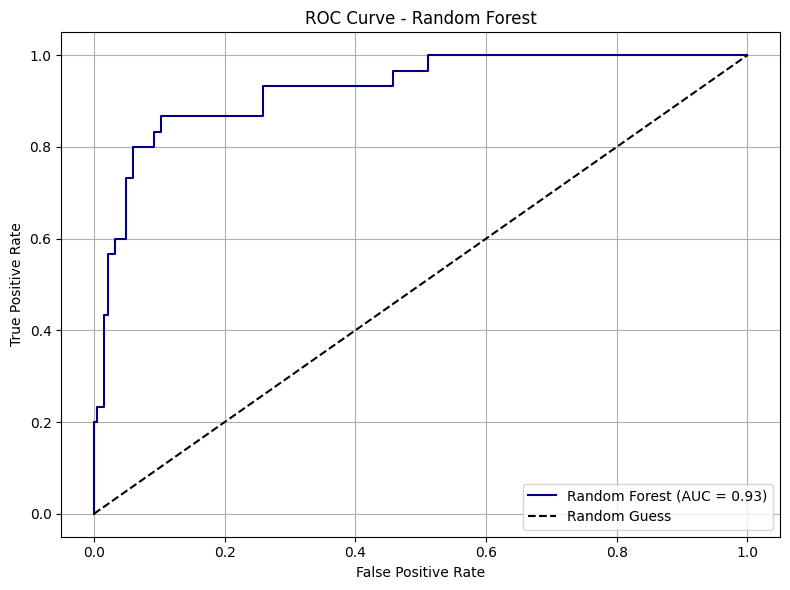

In [68]:
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
def load_and_preprocess(path):
    df = pd.read_csv(path)
    df.drop(columns=['Id'], errors='ignore', inplace=True)
    df['alcohol'] = np.sqrt(df['alcohol'])
    df['volatile acidity'] = np.sqrt(df['volatile acidity'])
    df['sulphates'] = np.log1p(df['sulphates'])
    df['acid_balance'] = df['fixed acidity'] - df['volatile acidity']
    df['sugar_to_acid_ratio'] = df['residual sugar'] / (df['fixed acidity'] + df['citric acid'])
    df['sulfur_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
    df['alcohol_density_index'] = df['alcohol'] / df['density']
    selected_features= [
        'acid_balance',
        'sugar_to_acid_ratio',
        'sulfur_ratio',
        'alcohol_density_index',
        'alcohol',
        'volatile acidity',
        'sulphates'
    ]
    z_scores = np.abs((df[selected_features] - df[selected_features].mean()) / df[selected_features].std())
    df = df[(z_scores < 3).all(axis=1)]
    df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 6.5 else 0)
    return df[selected_features], df['quality_binary']
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)
    param_grid = {
        'n_estimators': [300],
        'max_depth': [15],
        'min_samples_split': [2],
        'min_samples_leaf': [2],
        'criterion': ['gini']
    }
    rf = RandomForestClassifier(random_state=42)
    grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
    grid_rf.fit(X_train_resampled, y_train_resampled)
    best_rf = grid_rf.best_estimator_
    return best_rf, X_train_resampled, X_test, y_train_resampled, y_test
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_probs = model.predict_proba(X_test)[:, 1]
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    fpr, tpr, _ = roc_curve(y_test, y_test_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='navy')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.title('ROC Curve - Random Forest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
def save_model(model, filename="wine_quality_model.pkl"):
    joblib.dump(model, filename)
if __name__ == "__main__":
    X, y = load_and_preprocess("WineQT.csv")
    model, X_train, X_test, y_train, y_test = train_model(X, y)
    evaluate_model(model, X_train, X_test, y_train, y_test)
    save_model(model)

In [69]:
from google.colab import files
files.download("wine_quality_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>